## Testing for stationarity in time series

0: Download the data:

In [1]:
import pandas as pd
import quandl

In [2]:
QUANDL_KEY = '15L4ky9aN_bF_6uss8CA' # replace {key} with your own API key  
quandl.ApiConfig.api_key = QUANDL_KEY

df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
               start_date='2000-01-01', 
               end_date='2011-12-31')

df.rename(columns={'Value': 'price'}, inplace=True)
df = df.resample('M').last()

1. Import the libraries:

In [3]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

2. Define a function for running the ADF test:

In [4]:
def adf_test(x):
    '''
    Function for performing the Augmented Dickey-Fuller test for stationarity
    
    Null Hypothesis: time series is not stationary
    Alternate Hypothesis: time series is stationary
    
    Parameters
    ----------
    x : pd.Series / np.array
    The time series to be checked for stationarity
    
    Returns
    -------
    results: pd.DataFrame
    A DataFrame with the ADF test's results
    '''
    
    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']
    
    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)
    
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value
    
    return results

In [5]:
adf_test(df.price)

Test Statistic              3.510499
p-value                     1.000000
# of Lags Used             14.000000
# of Observations Used    129.000000
Critical Value (1%)        -3.482088
Critical Value (5%)        -2.884219
Critical Value (10%)       -2.578864
dtype: float64

3. Define a function for running the KPSS test:

In [6]:
def kpss_test(x, h0_type='c'):
    '''
    Function for performing the Kwiatkowski-Phillips-Schmidt-Shin test for stationarity
    
    Null Hypothesis: time series is stationary
    Alternate Hypothesis: time series is not stationary
    
    Parameters
    ----------
    x: pd.Series / np.array
    The time series to be checked for stationarity
    h0_type: str{'c', 'ct'}
    Indicates the null hypothesis of the KPSS test:
    * 'c': The data is stationary around a constant(default)
    * 'ct': The data is stationary around a trend
        
    Returns
    -------
    results: pd.DataFrame
    A DataFrame with the KPSS test's results
    '''
            
    indices = ['Test Statistic', 'p-value', '# of Lags']
            
    kpss_test = kpss(x, regression=h0_type)
    results = pd.Series(kpss_test[0:3], index=indices)
            
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value
            
    return results

In [7]:
kpss_test(df.price)

C:\Users\nking\AppData\Local\Temp\ipykernel_2800\2978501574.py:25: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(x, regression=h0_type)


Test Statistic           1.539929
p-value                  0.010000
# of Lags                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

4. Generate the ACF/PACF plots:

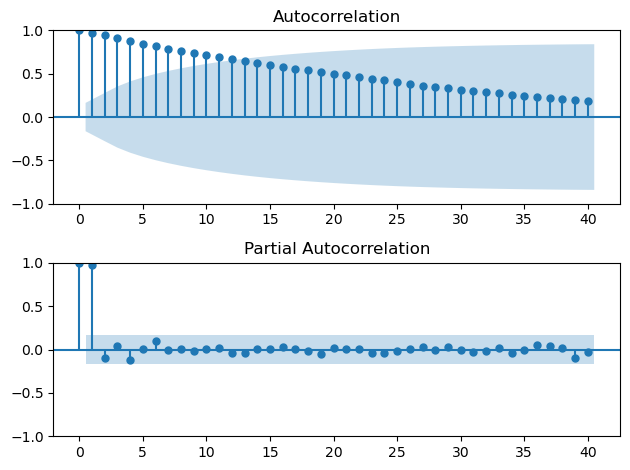

In [8]:
import matplotlib.pyplot as plt

N_LAGS = 40
SIGNIFICANCE_LEVEL = 0.05

fig, ax = plt.subplots(2, 1)
plot_acf(df.price, ax=ax[0], lags=N_LAGS, 
        alpha=SIGNIFICANCE_LEVEL)
plot_pacf(df.price, ax=ax[1], lags=N_LAGS, 
         alpha=SIGNIFICANCE_LEVEL)

plt.tight_layout()
plt.show()